<a href="https://colab.research.google.com/github/LWH4Data/Study-code/blob/main/%EA%B0%9C%EB%B0%9C%EC%9E%90%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%8B%A4%EC%A0%84_%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99_Chapter_3_%EC%97%B0%EC%8A%B5_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연습 문제 1 : 집적 해보기
1. 두 벡터를 입력받아 두 개의 수를 출력하는 파이썬 함수를 작성.
2. 이때 출력되는 두 개의 수는 하나는 피어슨 상관계수, 다른 하나는 코사인 유사도(이번 장의 공식을 통해 작성). np.coorrcoef와 spatial.distance.cosine 호출 X
3. 변수들이 이미 평균중심화 되어 있다면 두 출력의 결과가 동일하고 그렇지 않다면 결과가 서로 다른지 확인

In [ ]:
import numpy as np

# Make two vector x & y
x = np.random.randn(5)
y = np.random.randn(5)

# pearson correlation coefficient formula function
def pcc(x, y):
  xmc = x - np.mean(x)
  ymc = y - np.mean(y)

  numer1 = np.dot(xmc, ymc)
  deno1 = np.linalg.norm(xmc)*np.linalg.norm(ymc)

  pearson = numer1 / deno1
  return pearson

# cosine correlation coefficient formula function
def cs(x, y):
  numer = np.dot(x, y)
  deno = np.linalg.norm(x)*np.linalg.norm(y)

  cos = numer / deno
  return cos

print(f'피어슨 상관계수 : ', pcc(x, y), '코사인 상관계수 : ', cs(x, y))
print('If do not mean centering to pearson, it\'s formula is same the cosine.')

피어슨 상관계수 :  0.15425943975482345 코사인 상관계수 :  0.21365163971145662
If do not mean centering to pearson, it's formula is same the cosine.


## 연습 문제 1 : 교재 풀이
1. 동일 인자를 받는 함수를 생성하는 경우 개별로 성하지 않고 corrAndCosine과 같이 한번에 생성하는 것이 인상적이다. 인지하고 다음에 활용해 보자.

In [ ]:
# the function
def corrAndCosine(x, y):

  # compute cosine similarity
  num = np.dot(x, y) # numerator
  den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
  cos = num / den

  # compute correlation (similar to above but mean-centered!)
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  num = np.dot(xm, ym) # numerator
  den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
  cor = num / den

  return cor, cos

# test it
a = np.random.randn(15)
b = np.random.randn(15)

# compute the correlation cosine
r, c = corrAndCosine(a, b)

# confirm that the correlation matches with np.corrcoef
print(r, np.corrcoef(a ,b)[0, 1])

0.376764471708096 0.376764471708096


In [ ]:
# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)

# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print(np.round(corrAndCosine(a, b), 4))
print('')

print('With mean-centering (should be the same):')
print(np.round(corrAndCosine(aNoMean, bNoMean), 4))

Without mean-centering (should differ):
[0.2243 0.2145]

With mean-centering (should be the same):
[0.2243 0.2243]


---

## 연습 문제 2 : 직접 해보기
1. 0~3의 정수를갖는 변수 생성.
2. 생성한 변수에 특저 오프셋을 더한 두 번째 변수 생성.
3. 시스템적으로 오프셋을 -50 ~ +50 까지 변경하는 시뮬레이션을 생성. 예를 들어 첫 번째 반복시 두 번째 변수는 [-50, -49, -48, -47]이 된다.
4. for 루프를 통해 두 변수 간의 상관관계와 코사인 유사도를 계산하고 결과를 저장한다.
5. 평균 오프셋이 상관관계와 코사인 유사성에 어떻게 영향을 주는지 보여주는 선 그래프를 그린다.

(-1.0, 1.3)

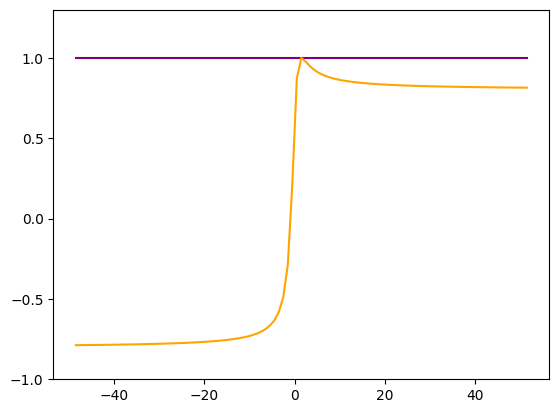

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Make a variable that can take values from 0 to 3.
var1 = np.arange(0, 4, 1)

# Make offsets
offs = np.zeros((101, 4))
for i in range(0, len(offs)):
  offs[i] = var1 + i-50

# Means of offsets
moffs = np.zeros((101))
for i in range(0, len(offs)):
  moffs[i] = np.mean(offs[i])

# compute pearson correlations and plot
corr = np.zeros((101))
for i in range(0, len(offs)):
  corr[i] = np.corrcoef(var1, offs[i])[0, 1]

# compute cosine and plot
cos = np.zeros((101))
for i in range(0, len(offs)):
  cos[i] = -(sp.spatial.distance.cosine(var1, offs[i])-1)

# Make plot
plt.plot(moffs, corr, color = 'purple')
plt.plot(moffs, cos, color = 'orange')
plt.ylim(-1, 1.3)

## 연습 문제 2 : 교재 풀이
1. 아직 인덱싱과 슬라이싱을 사용하는 게 미숙하다.
2. SciPy의 코사인 유사도 함수 spatial.distance.cosine()의 내부 소스는 이번 장에서 배운 것과 다른 방식으로 계산이 이루어진다.
 - 나의 코드에서는 이번 장에서 배운 것과 같이 구현되도록 코드를 변경해 주었다.
 - 교재는 1번에서 사용한 함수를 그대로 사용하였다.

<br>
정답을 구하는 로직은 구성이 되는데 구현이 미흡한듯하다. 역시 지금 선형대수학과 이후 딥러닝을 공부한 뒤에는 자료구조를 조금 더 공부를 해두는 것이 좋겠다.

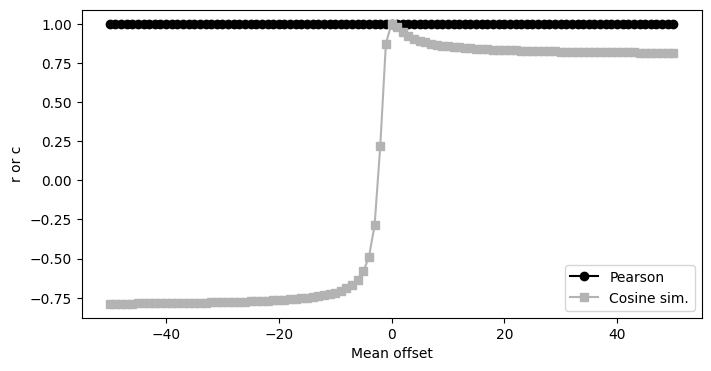

In [ ]:
# create the variables
a = np.arange(4, dtype = float)
offsets = np.arange(-50, 51)

# initialize the results
results = np.zeros((len(offsets), 2))

# run the simulation
for i in range(len(offsets)):
  results[i, :] = corrAndCosine(a, a+offsets[i])

# plot the results
plt.figure(figsize=(8, 4))
h = plt.plot(offsets, results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7, .7, .7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson', 'Cosine sim.'])
plt.savefig('Figure_03_02.png', dpi = 300) # write out the fig to a file
plt.show()


---

## 연습 문제 3 : 직접 해보기
1. SciPy 라이브러리의 stats 모듈 파일의 소스 코드를 열어 pearsonr의 파이썬 구현이 이번 장에서 소개한 공식과 어떻게 일치하는지 확인 및 이해
2. 힌트 : ??functionname

In [ ]:
import scipy as sp

sp.stats.pearsonr

<function scipy.stats._stats_py.pearsonr(x, y, *, alternative='two-sided', method=None)>



    r = \frac{\sum (x - m_x) (y - m_y)}
             {\sqrt{\sum (x - m_x)^2 \sum (y - m_y)^2}}

위의 코드는 SciPy의 stats모듈 내장 함수 pearsonr의 소스코드이다. \frac은 분수를 의미한다.

결과적으로 교재의 pearson correlation coefficient 수식과 동일함을 알 수 있다.

## 연습 문제 3 : 교재 풀이
1. 교재 풀이는 '??'을 이용하였는데 출력이 오른쪽에 나오기에 나의 경우 help()를 이용하여 해결하였다.

In [ ]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

## 연습 문제 4 : 직접 해보기
저장 파일이 날라갔다... 정말 매우 슬프다... 어제 공부한 교재 풀이를 인지하면서 다시 풀어보자.

<br>


** 파이썬에 내장 함수가 있음에도 함수를 작성하는 이유 **

- 교육적 목적 : 내장 함수들은 복잡하다 생각할 수 있지만 사실 뜯어보면 직접 구성할 수 있을만한 계산식으로 된 경우도 많다.
- 내장 함수의 경우 입력 받는 인자와 출력 형식으로 인해 코드 실행 시간이 오래 걸릴 수 있다. 간단한 계산의 경우 직접 함수를 구성하는 것이 코드 수행 시간을 단축할 수 있는 방법이 되기도 한다.

<br>

** 문제 **

1. 500 개의 무작위 수를 출하고 상관계수를 구하는 과정을 for 문을 통해 1,000 회 이상 수행한다.
2. 3-1번에서 직접 작성한 correlation 함수를 가져와 수행 시간을 확인한다.
3. 파이썬 NumPy의 내장함수 np.corrcoef()의 코드 수행 시간을 확인한다.

In [ ]:
import numpy as np

# Pearson correlation coefficient formula function
def pcc(x, y):
  xmc = x - np.mean(x)
  ymc = y - np.mean(y)

  numer1 = np.dot(xmc, ymc)
  deno1 = np.linalg.norm(xmc)*np.linalg.norm(ymc)

  pearson = numer1 / deno1
  return pearson

# Time
import time
clockStart = time.time()
# My function
for i in range(0, 1001):
  x = np.random.randn(500)
  y = np.random.randn(500)
  pcc(x, y)
t1 = time.time() - clockStart
print(t1)

# compute the time of corrcoef
clockStart = time.time()
# corrcoef function
for i in range(0, 1001):
  x = np.random.randn(500)
  y = np.random.randn(500)
  np.corrcoef(x, y)
t1 = t1 = time.time() - clockStart
print(t1)


0.06665372848510742
0.11105537414550781


## 연습 문제 4 : 교재 풀이
1. numIters, varLength를 이용한 소프트코딩.
2. np.random.randn(varLength, 2). 바로 튜플을 주어 난수 생성이 가능하다.

In [ ]:
import numpy as np
from scipy.stats import pearsonr

# a bare-bones correlation function
def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d

# import the time library
import time

# experiment parameters
numIters = 1000
varLength = 500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength, 2)
  rho(x[:, 0], x[:, 1])
t1 = time.time() - tic

# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength, 2)
  pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic

# print the result
# Note : time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'pearsonr took {t2*1000:.2f} ms')

My function took 210.25 ms
pearsonr took 2068.97 ms


---

## 연습 문제 5 : 직접 해보기
1. 검출기 만들기
2. 검출기의 커널은 [-1 +1]
3. 일정한 시계열 신호 조각(예를 들어 [10, 10])과 커널의 내적은 0.
4. 신호가 급격히 변화하면 내적이 커진다. 예를 들어 [1 10]와의 내적은 9.
5. 작업할 신호는 평평한 함수.
6. 그래프 A는 커널 / 그래프 B는 신호.

첫 번재 단계 : 이 두  시계열을 생성하는 코드 구현

1. 신호의 시점에 대해 for 루프 작성.
2. 각 시점에서 커널과 길이가 같은 시계열 데이터 조각과 커널 사이의 내적을 계산. 결과는 [그림 3-5]의 그래프 C와 유사해야 함.
3. 에지(edge) 검출기는 신호가 평평할 때 0, 신호가 상승할 때 +1, 신호가 하강할 때 -1을 반환하는 것을 확인.

두 번째 단계 : 커널을 [0 -1 1 0]과 같이 앞뒤에 0을 추가하면 어떤 영향을 줄것인지 [-1 1]로 뒤집으면 어떻게 될지 [-1 2]로 하면 어떻게 될지 변경하며 확인하기.

<br>

> 교재 풀이에서 plot에 값만 주면 x 축은 알아서 생성해 주는 것을 확인하였다. 이 점만을 참고해서 다시 풀어보자.

Text(0.5, 1.0, 'Time series')

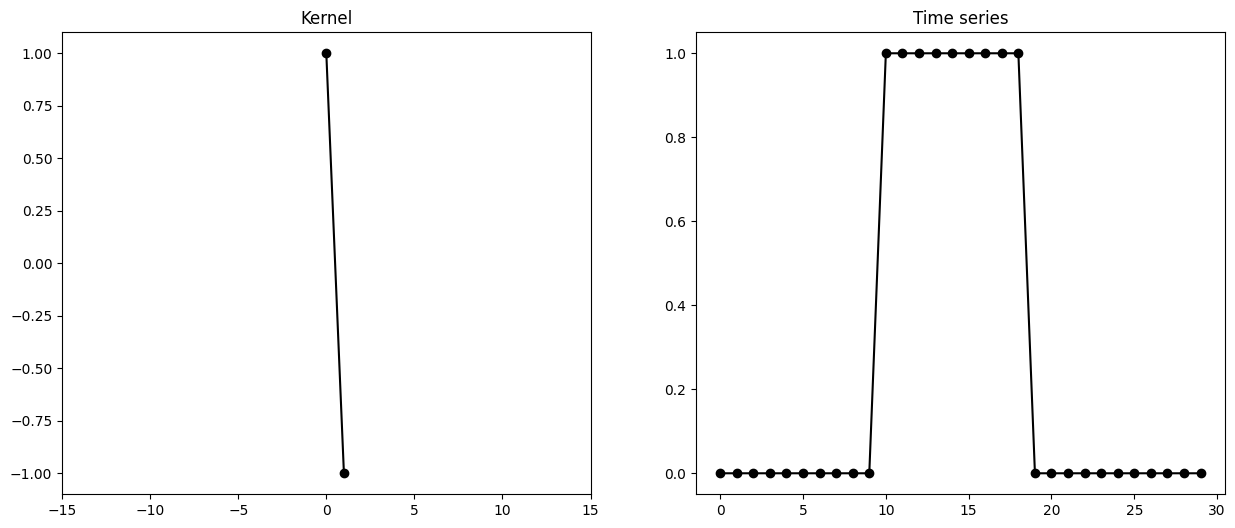

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make kernel
k = np.array([1, -1])

# Make time series
t = np.zeros(30)
t[10:19] = 1

# plot
fig, axs = plt.subplots(1, 2, figsize = (15, 6))
axs[0].plot(k, color = 'black', marker = 'o')
axs[1].plot(t, color = 'black', marker = 'o')
axs[0].set_xlim([-15, 15])

axs[0].set_title('Kernel')
axs[1].set_title('Time series')

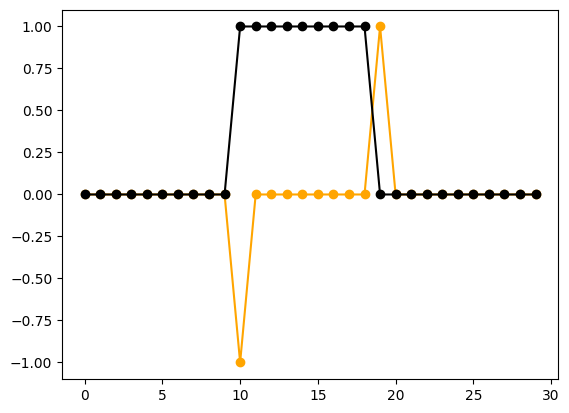

In [ ]:
# Make time seies vector for dot product
d = np.zeros(30)
for i in range(0, len(t)):
  if 0<=i<11:
    d[i] = np.dot(k, [0, t[i]])
  elif 11<=i<20:
    d[i] = np.dot(k, [1, t[i]])
  else:
    d[i] = np.dot(k, [0, t[i]])

# plot
plt.plot(d, color = 'orange', marker = 'o')
plt.plot(t, color = 'black', marker = 'o')



## 연습 문제 5 : 교재 풀이

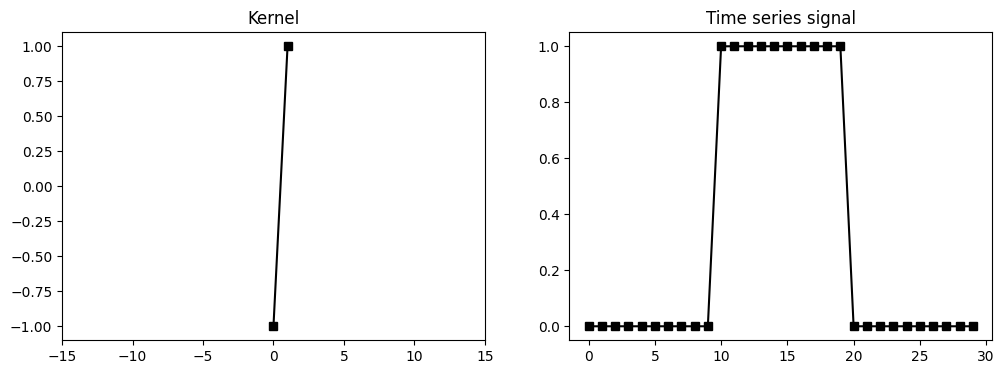

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create the kernel (in the book figure I used + 1.5)
kernel = np.array([-1, 1])

# and the 'signal' (a pateau)
signal = np.zeros(30)
signal[10 : 20] = 1

# plot them
_, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(kernel, 'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15, 15])

axs[1].plot(signal, 'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_04ab.png', dpi = 300)
plt.show()


1. signal[ : ]로 슬라이싱 할 때 베타적 상한이 포함된다. 이를 인지하고 범위를 주어야 한다. 나의 경우 배타적 상한을 고려하지 못하였다.
2. for문의 시작에 1을 주고 t-1, t+1을 사용한 것이 인상적이다.
3. 교재의 시각화 에서는 plt.stem()이 활용되었다. 특정 시각화 종류인데 아래 링크를 통해 공부할 수 있다.
>[plt.stem() 함수] - https://zephyrus1111.tistory.com/103

<br>

시계열 신호의 내적 범위는 1번을 통해 구했다. 가장 궁금한 부분이었기에 인지하고 넘어가자.

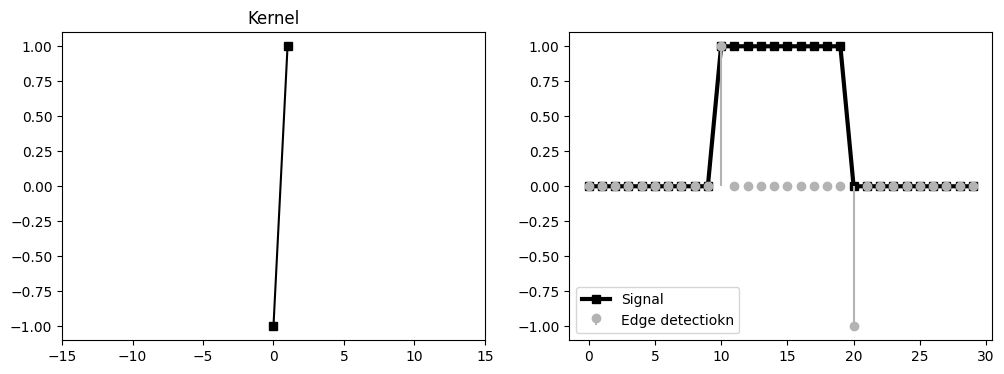

In [ ]:
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

# loop over the signal and do template-matching (via dot products)
for t in range(1, len(signal)-1):
  featureMap[t]=np.dot(kernel, signal[t-1:t+1])

# plot the result
_, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(kernel, 'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15, 15])

axs[1].plot(signal, 'ks-', label = 'Signal', linewidth = 3)
markers, stemlines, _ = axs[1].stem(range(len(featureMap)), featureMap,
                                    basefmt = ' ', linefmt='', markerfmt = 'o',
                                    label = 'Edge detectiokn')

plt.setp(stemlines, 'color', [.7, .7, .7])
plt.setp(markers, 'color', [.7, .7, .7])

axs[1].legend()
plt.savefig('Figure_03_04c.png', dpi = 300)
plt.show()

---

## 연습 문제 6 : 직접 해보기
1. 다른 신호와 kernel을 통해 5번의 과정을 재실행
2. 목표는 울퉁불퉁한 시계열을 매끄럽게 만드는 것.
3. 시계열은 가우스 분포에서 생성된 100개의 난수.
4. kernel은 가우스 함수에 근사하는 종 모양의 숫자 [0, .1, .3, .8, 1, .3, .1, 0]으로 정의. kernel의 합이 1이 되도록 조정해야 한다.
5. kernel은 문제의 그림 (A)와 동일하지만 신호는 난수이기에 (B)와 동일하지 않다.
6. 3-5번 문제의 코드를 복사하여 수행. for 루프의 인덱싱에 주의할 것.
7. 그림 (C)는 결과의 예제. 필터링된 신호가 원래 신호의 매끄러운 형태임을 알 수 있음. 이를 저주파(low-pass) 필터링 이라고도 한다.

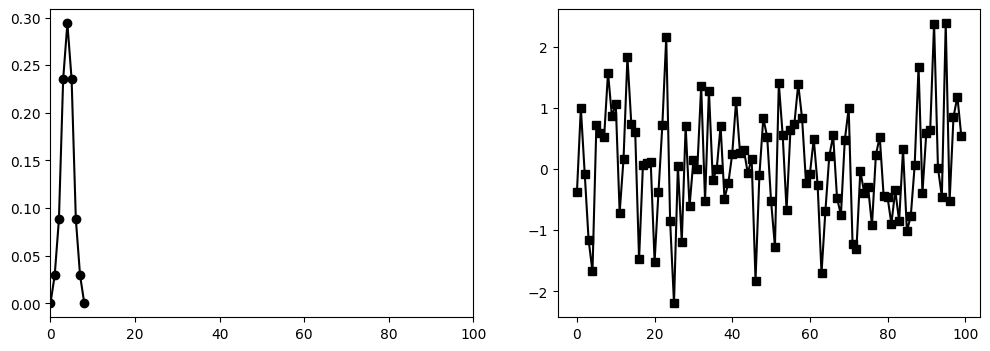

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make kernel
k = np.array([0, .1, .3, .8, 1, .8, .3, .1, 0])
k = (1/sum(k))*k

# Make time series
t = np.random.randn(100)

# plot them
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(k, color = 'black', marker = 'o')
axs[0].set_xlim(0, 100)
axs[1].plot(t, color = 'black', marker = 's')

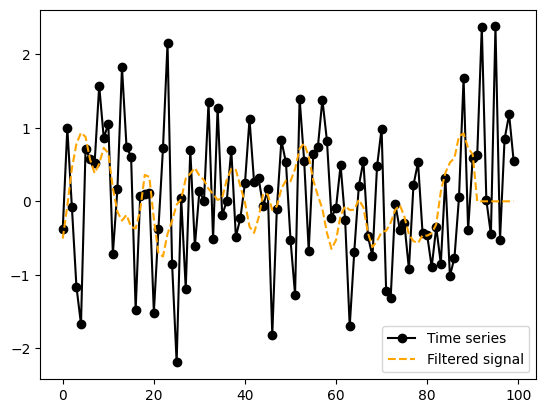

In [ ]:
# coompute dot product
d = np.zeros(len(t))
for i in range(0, len(t)-9):
  d[i] = np.dot(k, t[i : i+9])

plt.plot(t, color = 'black', marker = 'o', label = 'Time series')
plt.plot(d, color = 'orange', linestyle = '--', label = 'Filtered signal')
plt.legend()

## 연습 문제 6 : 교재 풀이

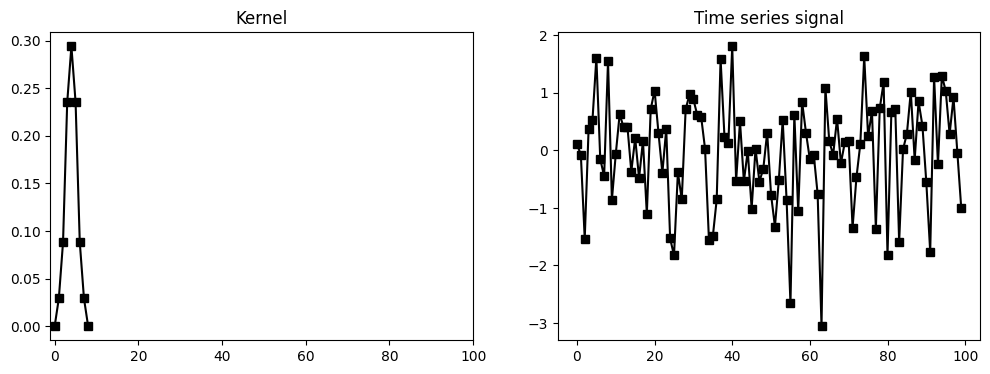

In [ ]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0, .1, .3, .8, 1, .8, .3, .1, 0])
kernel = kernel/np.sum(kernel)

# some handyt length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2

# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)

# plot them
_, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(kernel, 'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1, Nsignal])

axs[1].plot(timeseries, 'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_06ab.png', dpi = 300)
plt.show()

halfKrn으로 kernel의 절반 구간을 구한 뒤 이를 통해 for 문의 범위를 지정한 것을 인지하자.

```
for t in range(halfKrn+1, Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel, timeseries[t-halfKrn-1:t+halfKrn])
```

t에서 시작 수를 빼어 0 부터 시작
t에 시작수를 더하여 마지막 범위까지 계산 될 수 있도록 한다.


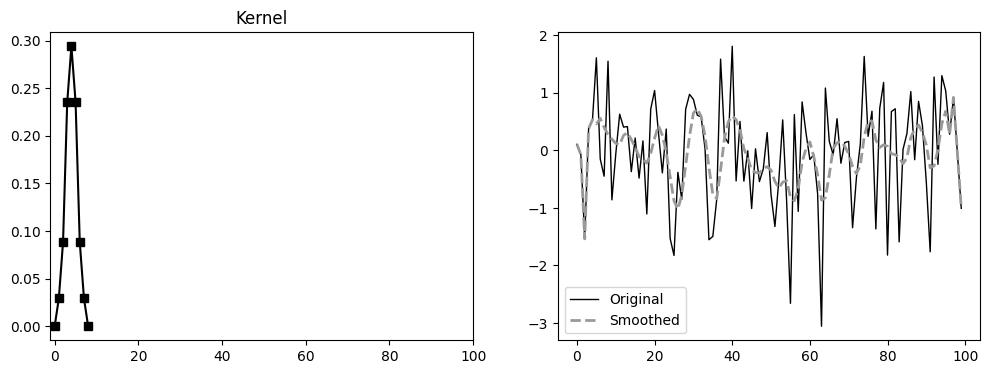

In [ ]:
# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1, Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel, timeseries[t-halfKrn-1:t+halfKrn])

# and plot
_, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(kernel, 'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1, Nsignal])

axs[1].plot(timeseries, color = 'k', label = 'Original', linewidth = 1)
axs[1].plot(filtsig, '--', color = [.6, .6, .6], label = 'Smoothed', linewidth= 2)
axs[1].legend()

plt.savefig('Figure_03_06c.png', dpi = 300)
plt.show()

## 연습 문제 7 (문제 X, 결과 확인)
1. kernel의 중앙의 1을 -1로 바꾸고 커널을 중앙 평균화.
2. 다시 필터링하여 그래프 그리기.
3. 결과는 더 날카로운 신호
4. 위처럼 변경한 커널은 낮은 주파수의 특징을 감쇄하고 빠르게 변환하는 고주파(high-pass) 필터이다.

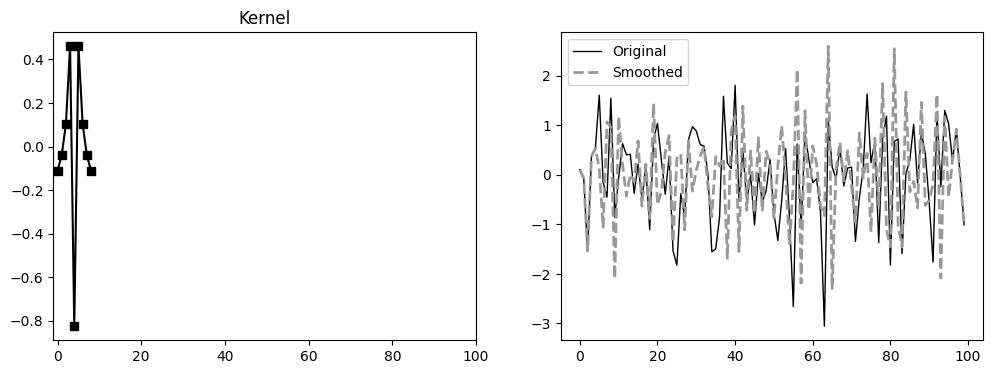

In [ ]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1, Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel, timeseries[t-halfKrn-1:t+halfKrn])

# and plot
_, axs = plt.subplots(1, 2, figsize = (12, 4))
axs[0].plot(kernel, 'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1, Nsignal])

axs[1].plot(timeseries, color = 'k', label = 'Original', linewidth = 1)
axs[1].plot(filtsig, '--', color = [.6, .6, .6], label = 'Smoothed', linewidth= 2)
axs[1].legend()

plt.savefig('Figure_03_06c.png', dpi = 300)
plt.show()

---

## 연습 문제 8 : 직접 해보기
1. 무작위로 클러스 중심을 초기화하며 클러스터링을 여러 번 반복한다.
2. 최종 클러스터와 비교하여 평가한다.

> - k-means는 거리를 기반으로 하기에 처음 설정된 군집 중심에서 큰 변화가 없을 것이다.
- 거리를 기반으로 하기에 원형으로 분포된 데이터의 군집화에는 효율적이나 원형으로 분포되지 않은 데이터에는 그렇지 못할 수 있다.


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Make data
data = np.random.randn(150, 2)

# Set centroid
k = 3
ridx = np.random.choice(range(len(data)), k, replace = False)
centroids = data[ridx, :]

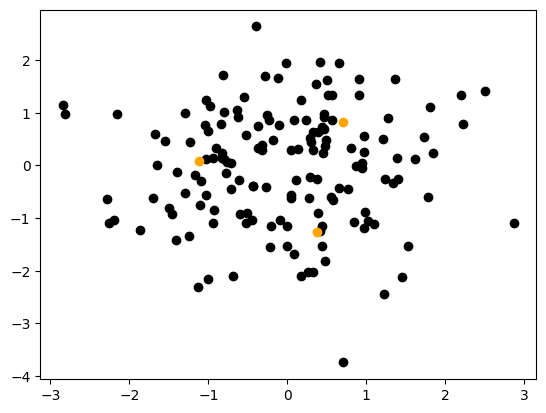

In [43]:
# Compute Euclidean distance
dists = np.zeros((data.shape[0], k))
for ci in range(k):
  dists[:, ci] = np.sum((data - centroids[ci, :])**2, axis = 1)

# Get index of minimum dists
groupidx = np.argmin(dists, axis = 1)

# Relocate the centroids using dists
for ki in range(k):
  centroids[ki, :] = [ np.mean(data[groupidx==ki, 0]),
                      np.mean(data[groupidx==ki, 1])]

#plot
plt.scatter(data[:, 0], data[:, 1], color = 'black')
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'orange')


## 연습 문제 8 : 교재 풀이
1. 아직 행렬의 shape이 익숙하지 않아 코드를 이해하는 데 오래 걸렸다. a, b, c의 경우 각각 (2, 50)이 된다. 이를 axis = 1로 연결하면 열방향으로 합쳐지기에 (2, 150)이 된다. 마지막으로 이를 전치하여 데이터를 만든다.

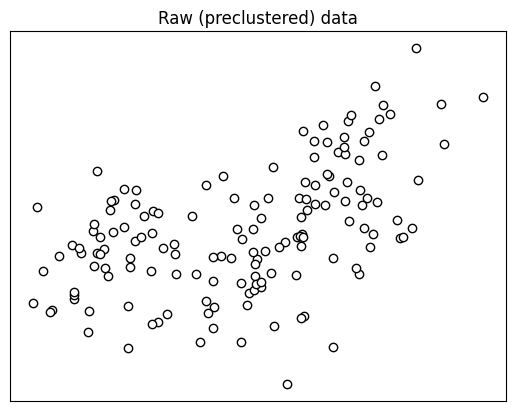

In [62]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
# 각 a, b, c는 (2, 50)이 된다.
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
# 단순히 합할 경우 axis=1인 열방향이기에 (2, 150)이 된다.
# 전치를 하면 (150, 2)가 된다.
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

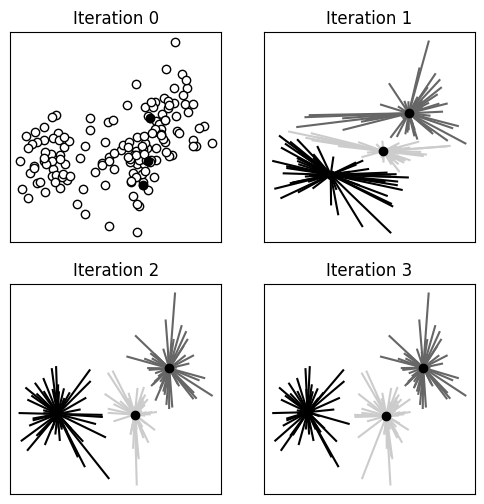

In [58]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):

  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)

  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]


  # plot data points
  # 중심과 데이터 사이의 선 시각화
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])

  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_03_03.png',dpi=300)
plt.show()

---

## 연습 문제 9 테스트 정리
1. 배열의 인덱스가 어색해서 이해하기 어렵다...
2. k의 개수에 상관없이 군집의 중심의 거의 비슷하게 형성된다. 이유는 연습 문제 8에서 서술한 것과 같다.

> k = 4로 하는 경우 'lineColors' 변수의 원소를 하나 더 생성해야 한다. 이유는 총 4개의 군집이 형성되기 때문이다.

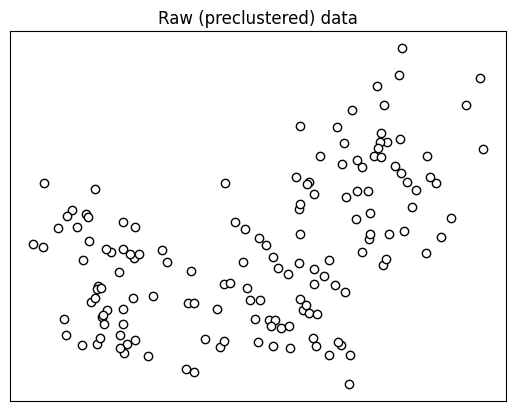

In [71]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
# 각 a, b, c는 (2, 50)이 된다.
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
# 단순히 합할 경우 axis=1인 열방향이기에 (2, 150)이 된다.
# 전치를 하면 (150, 2)가 된다.
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

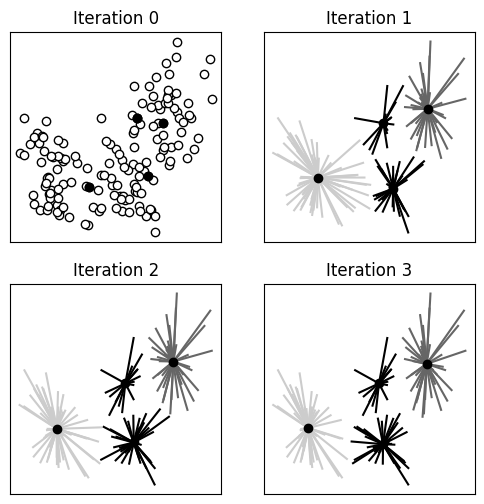

In [87]:
## initialize random cluster centroids
k = 4 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8], [0, 0, 0] ] #'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):

  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)

  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]


  # plot data points
  # 중심과 데이터 사이의 선 시각화
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ], color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_03_03.png',dpi=300)
plt.show()